# Un programme qui calcule la similarit´e entre deux documents avec deux approches differentes

# 1.a) Uniquement en utilisant la comparaison lexicale des mots des deux documents et en utilisant WodNet

téléchargement des fichiers nécessaires à l'utilisation de WordNet dans votre environnement Python. Ces fichiers contiennent les données lexicales et structurelles de WordNet, y compris les mots, les synsets et les relations entre eux.

In [1]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hajar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

télécharge les données associées au WordNet Open Multilingual Edition (OMW). Le WordNet Open Multilingual Edition est une version multilingue de WordNet qui contient des synsets et des relations sémantiques pour plusieurs langues.version14

In [3]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\hajar\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [4]:
from nltk.corpus import wordnet

les fichiers nécessaires pour utiliser le tokenizer "punkt" dans votre environnement Python via NLTK. Ces fichiers contiennent des modèles et des règles linguistiques pour segmenter un texte en phrases et en mots de manière précise.

In [5]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hajar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
# Définissez une fonction pour normaliser les mots en utilisant la lemmatisation
import re
import string
# necessite bcp de capacite de calcul
def normalize_words(text):
    # Convertir le texte en minuscules
    text = text.lower()
    tokens = word_tokenize(text)
    # Supprimer la ponctuation
    text = [mot.translate(str.maketrans("", "", string.punctuation)) for mot in tokens]

    # Supprimer les chiffres
    text = [re.sub(r"\d+", "", mot) for mot in text]
    
    # Supprimer les espaces supplémentaires
    text = " ".join(text)
    text = re.sub(r"\s+", " ", text)
    text = text.strip()
    
    return text

La similarité de chemin (path similarity) est une mesure qui quantifie à quel point deux synsets sont similaires en utilisant la distance entre eux dans la hiérarchie WordNet. 

In [7]:
# Calculez la similarité entre les documents en utilisant la comparaison lexicale des mots et WordNet :
def calculate_similarity(document1, document2):
    if document1.lower() == document2.lower():
        return 1
    normalized_doc1 = normalize_words(document1)
    normalized_doc2 = normalize_words(document2)

    similarity_score = 0

    for word1 in normalized_doc1:
        word1_synsets = wordnet.synsets(word1)
        max_similarity = 0

        for word2 in normalized_doc2:
            word2_synsets = wordnet.synsets(word2)

            for synset1 in word1_synsets:
                for synset2 in word2_synsets:
                    similarity = synset1.path_similarity(synset2)
                    if similarity is not None and similarity > max_similarity:
                        max_similarity = similarity

        similarity_score += max_similarity

    average_similarity = similarity_score / len(normalized_doc1)

    return average_similarity


In [8]:
# document1 ="Le soleil se lève lentement à l'horizon, éclairant doucement le paysage endormi. "
# document2 ="Au lever du jour, le soleil se lève paisiblement à l'horizon, illuminant délicatement le paysage qui se réveille. "
# document1 ="Le soleil se lève lentement à l'horizon"
# document2 ="Le soleil se lève lentement à l'horizon"
document1 ="programmation"
document2 ="java"
similarity = calculate_similarity(document1, document2)
print("Similarity:", similarity)

Similarity: 0.43589743589743585


# 1.b) En utilisant word embedding et la distance Word Mover’s Distance ( la bibliotheque gensim et les word embedding)

In [9]:
import spacy
import numpy as np
import gensim

In [9]:
from gensim.models import KeyedVectors
from gensim.similarities import WmdSimilarity

In [11]:
!pip install pyemd

Defaulting to user installation because normal site-packages is not writeable


In [12]:

from gensim.models import KeyedVectors

path_to_embeddings = 'glove.6B.100d.txt'
word2vec_model = KeyedVectors.load_word2vec_format(path_to_embeddings, binary=False, no_header=True)

# Reste du code inchangé
# document1 = "Le chat mange une souris"
# document2 = "Le chien poursuit le chat"
document1 = "java programmation"
document2 = "programmation language"
doc1 = document1.lower().split()
doc2 = document2.lower().split()

instance = WmdSimilarity([doc1], word2vec_model, num_best=1)
similarity = instance[doc2][0][1]

print("Similarité entre les documents : ", similarity)



Similarité entre les documents :  0.4911296879698428


# generation des word embedding sp´ecifiques destin´ees au domaine de l’informatique avec deux m´ethodes diff´erentes:

# 2.a)  g´en´eration des word emebdding from scratch

In [13]:
# Import Python libraries and helper functions (in utils2) 
import nltk
from nltk.tokenize import word_tokenize
import numpy as np
from collections import Counter


In [14]:
import numpy as np
from scipy import linalg
from collections import defaultdict


def sigmoid(z):
    # sigmoid function
    return 1.0/(1.0+np.exp(-z))




 prend deux arguments : words (une liste de mots) et word2Ind (un dictionnaire qui fait correspondre chaque mot à un index).
 Finalement, la fonction retourne la liste idx qui contient les index correspondant à chaque mot dans la liste words selon le dictionnaire word2Ind.

In [15]:
def get_idx(words, word2Ind):
    idx = []
    for word in words:
        idx = idx + [word2Ind[word]]
    return idx

prend deux arguments : context_words (une liste de mots) et word2Ind (un dictionnaire qui fait correspondre chaque mot à un index).
Finalement, la fonction retourne la liste packed qui contient des tuples d'index et de fréquence correspondant à chaque mot dans context_words selon le dictionnaire word2Ind et la fréquence calculée.

In [16]:
def pack_idx_with_frequency(context_words, word2Ind):
    freq_dict = defaultdict(int)
    for word in context_words:
        freq_dict[word] += 1
    idxs = get_idx(context_words, word2Ind)
    packed = []
    for i in range(len(idxs)):
        idx = idxs[i]
        freq = freq_dict[context_words[i]]
        packed.append((idx, freq))
    return packed



In [17]:
def get_vectors(data, word2Ind, V, C):
    i = C
    while True:
        y = np.zeros(V)
        x = np.zeros(V)
        center_word = data[i]
        y[word2Ind[center_word]] = 1
        context_words = data[(i - C):i] + data[(i+1):(i+C+1)]
        num_ctx_words = len(context_words)
        for idx, freq in pack_idx_with_frequency(context_words, word2Ind):
            x[idx] = freq/num_ctx_words
        yield x, y
        i += 1
        if i >= len(data):
            print('i is being set to 0')
            i = 0


fonction permet de générer des lots de données (batch_x et batch_y) de taille batch_size à partir des paires de vecteurs d'entrée-sortie renvoyées par la fonction get_vectors. Chaque lot est renvoyé en utilisant l'instruction yield et la fonction peut être utilisée de manière itérative pour obtenir les lots de données dans un flux continu.

In [18]:
def get_batches(data, word2Ind, V, C, batch_size):
    batch_x = []
    batch_y = []
    for x, y in get_vectors(data, word2Ind, V, C):
        while len(batch_x) < batch_size:
            batch_x.append(x)
            batch_y.append(y)
        else:
            yield np.array(batch_x).T, np.array(batch_y).T
            batch = []


réalise l'analyse en composantes principales (ACP) sur les données fournies.

In [19]:
def compute_pca(data, n_components=2):
    """
    Input: 
        data: of dimension (m,n) where each row corresponds to a word vector
        n_components: Number of components you want to keep.
    Output: 
        X_reduced: data transformed in 2 dims/columns + regenerated original data
    pass in: data as 2D NumPy array
    """

    m, n = data.shape

    ### START CODE HERE ###
    # mean center the data
    data -= data.mean(axis=0)
    # calculate the covariance matrix
    R = np.cov(data, rowvar=False)
    # calculate eigenvectors & eigenvalues of the covariance matrix
    # use 'eigh' rather than 'eig' since R is symmetric,
    # the performance gain is substantial
    evals, evecs = linalg.eigh(R)
    # sort eigenvalue in decreasing order
    # this returns the corresponding indices of evals and evecs
    idx = np.argsort(evals)[::-1]

    evecs = evecs[:, idx]
    # sort eigenvectors according to same index
    evals = evals[idx]
    # select the first n eigenvectors (n is desired dimension
    # of rescaled data array, or dims_rescaled_data)
    evecs = evecs[:, :n_components]
    ### END CODE HERE ###
    return np.dot(evecs.T, data.T).T



In [20]:
def get_dict(data):
    """
    Input:
        K: the number of negative samples
        data: the data you want to pull from
        indices: a list of word indices
    Output:
        word_dict: a dictionary with the weighted probabilities of each word
        word2Ind: returns dictionary mapping the word to its index
        Ind2Word: returns dictionary mapping the index to its word
    """
    #
#     words = nltk.word_tokenize(data)
    words = sorted(list(set(data)))
    n = len(words)
    idx = 0
    # return these correctly
    word2Ind = {}
    Ind2word = {}
    for k in words:
        word2Ind[k] = idx
        Ind2word[idx] = k
        idx += 1
    return word2Ind, Ind2word


In [21]:
# Download sentence tokenizer
nltk.data.path.append('.')

In [22]:
# Load, tokenize and process the data
import re                                                           #  Load the Regex-modul
with open('WordembeddingGeneration.txt','r', encoding='utf-8') as f:
    data = f.read()                                                 #  Read in the data
data = re.sub(r'[,!?;-]', '.',data)                                 #  Punktuations are replaced by .
data = nltk.word_tokenize(data)                                     #  Tokenize string to words
data = [ ch.lower() for ch in data if ch.isalpha() or ch == '.']    #  Lower case and drop non-alphabetical tokens
print("Number of tokens:", len(data),'\n', data[:15])               #  print data sample

Number of tokens: 8352 
 ['is', 'a', 'react', 'framework', 'trusted', 'by', 'streaming', 'sites', 'like', 'hulu', 'and', 'netflix', '.', 'if', 'you']


In [23]:
# Compute the frequency distribution of the words in the dataset (vocabulary)
fdist = nltk.FreqDist(word for word in data)
print("Size of vocabulary: ",len(fdist) )
print("Most frequent tokens: ",fdist.most_common(20) ) # print the 20 most frequent words and their freq.

Size of vocabulary:  1813
Most frequent tokens:  [('.', 1199), ('the', 408), ('software', 280), ('of', 271), ('and', 229), ('engineering', 200), ('to', 149), ('in', 139), ('a', 118), ('is', 94), ('as', 75), ('for', 74), ('that', 67), ('data', 58), ('retrieved', 58), ('https', 57), ('computer', 53), ('engineers', 47), ('it', 46), ('on', 45)]


In [24]:
# get_dict creates two dictionaries, converting words to indices and viceversa.
word2Ind, Ind2word = get_dict(data)
V = len(word2Ind)
print("Size of vocabulary: ", V)

Size of vocabulary:  1813


In [25]:
# example of word to index mapping
print("Index of the word 'software' :  ",word2Ind['software'] )
print("Word which has index 1199:  ",Ind2word[1199] )

Index of the word 'software' :   1480
Word which has index 1199:   periods


In [26]:
#Training the Model
# UNQ_C1 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# GRADED FUNCTION: initialize_model
def initialize_model(N,V, random_seed=1):
    '''
    Inputs: 
        N:  dimension of hidden vector 
        V:  dimension of vocabulary
        random_seed: random seed for consistent results in the unit tests
     Outputs: 
        W1, W2, b1, b2: initialized weights and biases
    '''
    
    np.random.seed(random_seed)
    
    ### START CODE HERE (Replace instances of 'None' with your code) ###
    # W1 has shape (N,V)
    W1 = np.random.rand(N,V)
    # W2 has shape (V,N)
    W2 = np.random.rand(V,N)
    # b1 has shape (N,1)
    b1 = np.random.rand(N,1)
    # b2 has shape (V,1)
    b2 = np.random.rand(V,1)
    ### END CODE HERE ###

    return W1, W2, b1, b2

In [27]:
# Test your function example.
tmp_N = 4
tmp_V = 10
tmp_W1, tmp_W2, tmp_b1, tmp_b2 = initialize_model(tmp_N,tmp_V)
assert tmp_W1.shape == ((tmp_N,tmp_V))
assert tmp_W2.shape == ((tmp_V,tmp_N))
print(f"tmp_W1.shape: {tmp_W1.shape}")
print(f"tmp_W2.shape: {tmp_W2.shape}")
print(f"tmp_b1.shape: {tmp_b1.shape}")
print(f"tmp_b2.shape: {tmp_b2.shape}")

tmp_W1.shape: (4, 10)
tmp_W2.shape: (10, 4)
tmp_b1.shape: (4, 1)
tmp_b2.shape: (10, 1)


In [28]:
#Softmax
# UNQ_C2 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# GRADED FUNCTION: softmax
def softmax(z):
    '''
    Inputs: 
        z: output scores from the hidden layer
    Outputs: 
        yhat: prediction (estimate of y)
    '''
    
    ### START CODE HERE (Replace instances of 'None' with your own code) ###
    
    # Calculate yhat (softmax)
    e_z = np.exp(z)
    yhat = e_z/np.sum(e_z,axis=0)
    
    ### END CODE HERE ###
    
    return yhat

In [29]:
# Test the function
tmp = np.array([[1,2,3],
                [1,1,1]
               ])
tmp_sm = softmax(tmp)
display(tmp_sm)

array([[0.5       , 0.73105858, 0.88079708],
       [0.5       , 0.26894142, 0.11920292]])

In [30]:
#Forward propagation
def forward_prop(x, W1, W2, b1, b2):
    '''
    Inputs: 
        x:  average one hot vector for the context 
        W1, W2, b1, b2:  matrices and biases to be learned
     Outputs: 
        z:  output score vector
    '''
    
    ### START CODE HERE (Replace instances of 'None' with your own code) ###
    
    # Calculate h
    h = np.dot(W1,x)+b1
    
    # Apply the relu on h (store result in h)
    h = np.maximum(0,h)
    
    # Calculate z
    z = np.dot(W2,h)+b2
    
    ### END CODE HERE ###

    return z, h

In [31]:
# Test the function

# Create some inputs
tmp_N = 2
tmp_V = 3
tmp_x = np.array([[0,1,0]]).T
tmp_W1, tmp_W2, tmp_b1, tmp_b2 = initialize_model(N=tmp_N,V=tmp_V, random_seed=1)

print(f"x has shape {tmp_x.shape}")
print(f"N is {tmp_N} and vocabulary size V is {tmp_V}")

# call function
tmp_z, tmp_h = forward_prop(tmp_x, tmp_W1, tmp_W2, tmp_b1, tmp_b2)
print("call forward_prop")
print()
# Look at output
print(f"z has shape {tmp_z.shape}")
print("z has values:")
print(tmp_z)

print()

print(f"h has shape {tmp_h.shape}")
print("h has values:")
print(tmp_h)

x has shape (3, 1)
N is 2 and vocabulary size V is 3
call forward_prop

z has shape (3, 1)
z has values:
[[0.55379268]
 [1.58960774]
 [1.50722933]]

h has shape (2, 1)
h has values:
[[0.92477674]
 [1.02487333]]


In [32]:
# compute_cost: cross-entropy cost functioN
def compute_cost(y, yhat, batch_size):
    # cost function 
    logprobs = np.multiply(np.log(yhat),y) + np.multiply(np.log(1 - yhat), 1 - y)
    cost = - 1/batch_size * np.sum(logprobs)
    cost = np.squeeze(cost)
    return cost

In [33]:
# Test the function
tmp_C = 2
tmp_N = 50
tmp_batch_size = 4
tmp_word2Ind, tmp_Ind2word = get_dict(data)
tmp_V = len(word2Ind)

tmp_x, tmp_y = next(get_batches(data, tmp_word2Ind, tmp_V,tmp_C, tmp_batch_size))
        
print(f"tmp_x.shape {tmp_x.shape}")
print(f"tmp_y.shape {tmp_y.shape}")

tmp_W1, tmp_W2, tmp_b1, tmp_b2 = initialize_model(tmp_N,tmp_V)

print(f"tmp_W1.shape {tmp_W1.shape}")
print(f"tmp_W2.shape {tmp_W2.shape}")
print(f"tmp_b1.shape {tmp_b1.shape}")
print(f"tmp_b2.shape {tmp_b2.shape}")

tmp_z, tmp_h = forward_prop(tmp_x, tmp_W1, tmp_W2, tmp_b1, tmp_b2)
print(f"tmp_z.shape: {tmp_z.shape}")
print(f"tmp_h.shape: {tmp_h.shape}")

tmp_yhat = softmax(tmp_z)
print(f"tmp_yhat.shape: {tmp_yhat.shape}")

tmp_cost = compute_cost(tmp_y, tmp_yhat, tmp_batch_size)
print("call compute_cost")
print(f"tmp_cost {tmp_cost:.4f}")

tmp_x.shape (1813, 4)
tmp_y.shape (1813, 4)
tmp_W1.shape (50, 1813)
tmp_W2.shape (1813, 50)
tmp_b1.shape (50, 1)
tmp_b2.shape (1813, 1)
tmp_z.shape: (1813, 4)
tmp_h.shape: (50, 4)
tmp_yhat.shape: (1813, 4)
call compute_cost
tmp_cost 7.9025


In [34]:
#  back_prop
def back_prop(x, yhat, y, h, W1, W2, b1, b2, batch_size):
    '''
    Inputs: 
        x:  average one hot vector for the context 
        yhat: prediction (estimate of y)
        y:  target vector
        h:  hidden vector (see eq. 1)
        W1, W2, b1, b2:  matrices and biases  
        batch_size: batch size 
     Outputs: 
        grad_W1, grad_W2, grad_b1, grad_b2:  gradients of matrices and biases   
    '''
    ### START CODE HERE (Replace instanes of 'None' with your code) ###
    
    # Compute l1 as W2^T (Yhat - Y)
    # Re-use it whenever you see W2^T (Yhat - Y) used to compute a gradient
    l1 = np.dot(W2.T,(yhat-y))
    # Apply relu to l1
    l1 = np.maximum(0,l1)
    # Compute the gradient of W1
    grad_W1 = (1/batch_size)*np.dot(l1,x.T) 
    # Compute the gradient of W2
    grad_W2 = (1/batch_size)*np.dot(yhat-y,h.T)
    # Compute the gradient of b1
    grad_b1 = np.sum((1/batch_size)*np.dot(l1,x.T),axis=1,keepdims=True)
    # Compute the gradient of b2
    grad_b2 = np.sum((1/batch_size)*np.dot(yhat-y,h.T),axis=1,keepdims=True)
    ### END CODE HERE ###
    
    return grad_W1, grad_W2, grad_b1, grad_b2

In [35]:
# Test the function
tmp_C = 2
tmp_N = 50
tmp_batch_size = 4
tmp_word2Ind, tmp_Ind2word = get_dict(data)
tmp_V = len(word2Ind)

# get a batch of data
tmp_x, tmp_y = next(get_batches(data, tmp_word2Ind, tmp_V,tmp_C, tmp_batch_size))

print("get a batch of data")
print(f"tmp_x.shape {tmp_x.shape}")
print(f"tmp_y.shape {tmp_y.shape}")

print()
print("Initialize weights and biases")
tmp_W1, tmp_W2, tmp_b1, tmp_b2 = initialize_model(tmp_N,tmp_V)

print(f"tmp_W1.shape {tmp_W1.shape}")
print(f"tmp_W2.shape {tmp_W2.shape}")
print(f"tmp_b1.shape {tmp_b1.shape}")
print(f"tmp_b2.shape {tmp_b2.shape}")

print()
print("Forwad prop to get z and h")
tmp_z, tmp_h = forward_prop(tmp_x, tmp_W1, tmp_W2, tmp_b1, tmp_b2)
print(f"tmp_z.shape: {tmp_z.shape}")
print(f"tmp_h.shape: {tmp_h.shape}")

print()
print("Get yhat by calling softmax")
tmp_yhat = softmax(tmp_z)
print(f"tmp_yhat.shape: {tmp_yhat.shape}")

tmp_m = (2*tmp_C)
tmp_grad_W1, tmp_grad_W2, tmp_grad_b1, tmp_grad_b2 = back_prop(tmp_x, tmp_yhat, tmp_y, tmp_h, tmp_W1, tmp_W2, tmp_b1, tmp_b2, tmp_batch_size)

print()
print("call back_prop")
print(f"tmp_grad_W1.shape {tmp_grad_W1.shape}")
print(f"tmp_grad_W2.shape {tmp_grad_W2.shape}")
print(f"tmp_grad_b1.shape {tmp_grad_b1.shape}")
print(f"tmp_grad_b2.shape {tmp_grad_b2.shape}")

get a batch of data
tmp_x.shape (1813, 4)
tmp_y.shape (1813, 4)

Initialize weights and biases
tmp_W1.shape (50, 1813)
tmp_W2.shape (1813, 50)
tmp_b1.shape (50, 1)
tmp_b2.shape (1813, 1)

Forwad prop to get z and h
tmp_z.shape: (1813, 4)
tmp_h.shape: (50, 4)

Get yhat by calling softmax
tmp_yhat.shape: (1813, 4)

call back_prop
tmp_grad_W1.shape (50, 1813)
tmp_grad_W2.shape (1813, 50)
tmp_grad_b1.shape (50, 1)
tmp_grad_b2.shape (1813, 1)


In [36]:
#gradient_descent
def gradient_descent(data, word2Ind, N, V, num_iters, alpha=0.03):
    
    '''
    This is the gradient_descent function
    
      Inputs: 
        data:      text
        word2Ind:  words to Indices
        N:         dimension of hidden vector  
        V:         dimension of vocabulary 
        num_iters: number of iterations  
     Outputs: 
        W1, W2, b1, b2:  updated matrices and biases   

    '''
    W1, W2, b1, b2 = initialize_model(N,V, random_seed=282)
    batch_size = 128
    iters = 0
    C = 2
    for x, y in get_batches(data, word2Ind, V, C, batch_size):
        ### START CODE HERE (Replace instances of 'None' with your own code) ###
        # Get z and h
        z, h = forward_prop(x, W1, W2, b1, b2)
        # Get yhat
        yhat = softmax(z)
        # Get cost
        cost = compute_cost(y, yhat, batch_size)
        if ( (iters+1) % 10 == 0):
            print(f"iters: {iters + 1} cost: {cost:.6f}")
        # Get gradients
        grad_W1, grad_W2, grad_b1, grad_b2 = back_prop(x, yhat, y, h, W1, W2, b1, b2, batch_size)
        
        # Update weights and biases
        W1 -= alpha*grad_W1 
        W2 -= alpha*grad_W2
        b1 -= alpha*grad_b1
        b2 -= alpha*grad_b2
        
        ### END CODE HERE ###
        
        iters += 1 
        if iters == num_iters: 
            break
        if iters % 100 == 0:
            alpha *= 0.66
            
    return W1, W2, b1, b2

In [37]:
# test your function
C = 2
N = 50
word2Ind, Ind2word = get_dict(data)
V = len(word2Ind)
num_iters = 150
print("Call gradient_descent")
W1, W2, b1, b2 = gradient_descent(data, word2Ind, N, V, num_iters)

Call gradient_descent
iters: 10 cost: 0.094730
iters: 20 cost: 0.038076
iters: 30 cost: 0.023915
iters: 40 cost: 0.017450
iters: 50 cost: 0.013743
iters: 60 cost: 0.011337
iters: 70 cost: 0.009650
iters: 80 cost: 0.008401
iters: 90 cost: 0.007438
iters: 100 cost: 0.006674
iters: 110 cost: 0.006231
iters: 120 cost: 0.005861
iters: 130 cost: 0.005532
iters: 140 cost: 0.005238
iters: 150 cost: 0.004974


In [39]:
# visualizing the word vectors here
from matplotlib import pyplot
%config InlineBackend.figure_format = 'svg'
words = ['react', 'framework', 'trusted', 'by', 'streaming', 'sites', 'like', 'hulu', 'and', 'netflix']

embs = (W1.T + W2)/2.0
 
# given a list of words and the embeddings, it returns a matrix with all the embeddings
idx = [word2Ind[word] for word in words]
X = embs[idx, :]
print(X.shape, idx)  # X.shape:  Number of words of dimension N each 

(10, 50) [1324, 646, 1665, 209, 1535, 1464, 934, 759, 83, 1077]


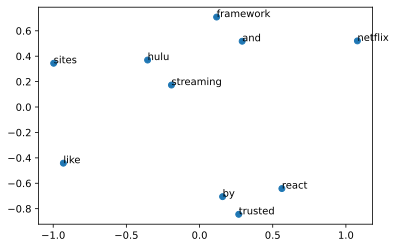

In [40]:
result= compute_pca(X, 2)
pyplot.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

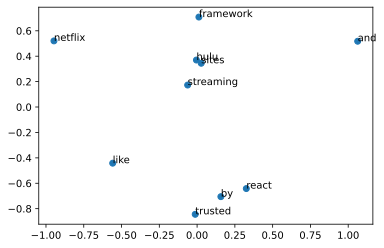

In [41]:
result= compute_pca(X, 4)
pyplot.scatter(result[:, 3], result[:, 1])
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 3], result[i, 1]))
pyplot.show()

In [42]:
#visualisation des vecteurs 
X

array([[ 0.10767524,  0.20219147, -0.06222747,  0.28193263, -0.31841616,
         0.26986003, -0.25731064,  0.19846692,  0.09490626, -0.08133394,
        -0.00986581, -0.17586883,  0.17338507,  0.01272452,  0.33894586,
         0.27942353, -0.31099533,  0.06793946, -0.17348737,  0.14053802,
        -0.13394632,  0.01606149, -0.17952834, -0.01883318,  0.37023088,
         0.01695817, -0.01489588,  0.04114034,  0.16092006,  0.29985312,
        -0.31342144,  0.51900689,  0.52861869,  0.25805066,  0.19058117,
        -0.00377158,  0.02736587,  0.09211965,  0.11554686,  0.12293772,
         0.28249015,  0.15227581, -0.19367459,  0.24204471,  0.02157375,
         0.03003778, -0.04388013, -0.16175695,  0.00321559, -0.36851509],
       [ 0.06664757, -0.0987117 , -0.07478555, -0.09677338,  0.09298626,
        -0.27707037,  0.23451413,  0.0647406 , -0.12801054, -0.06932603,
         0.14112613,  0.11311845, -0.26487288, -0.34977588, -0.07690692,
        -0.00619208, -0.01275802,  0.33398659, -0.

# 2.b) en utilisant la biblioth`eque Gensim

In [43]:
from gensim.models import Word2Vec

In [44]:
with open('WordembeddingGeneration.txt','r', encoding='utf-8') as f:
    data = f.read()  

In [45]:
def split_to_sentences(data):
    """
    Split data by linebreak "\n"
    
    Args:
        data: str
    
    Returns:
        A list of sentences
    """
    ### START CODE HERE (Replace instances of 'None' with your code) ###
    sentences = data.split('\n')
    ### END CODE HERE ###
    
    # Additional clearning (This part is already implemented)
    # - Remove leading and trailing spaces from each sentence
    # - Drop sentences if they are empty strings.
    sentences = [s.strip() for s in sentences]
    sentences = [s for s in sentences if len(s) > 0]
    
    return sentences    

In [46]:
x = """
I have a pen.\nI have an apple. \nAh\nApple pen.\n
"""
print(x)

split_to_sentences(x)


I have a pen.
I have an apple. 
Ah
Apple pen.




['I have a pen.', 'I have an apple.', 'Ah', 'Apple pen.']

In [47]:
import nltk
def tokenize_sentences(sentences):
    """
    Tokenize sentences into tokens (words)
    
    Args:
        sentences: List of strings
    
    Returns:
        List of lists of tokens
    """
    
    # Initialize the list of lists of tokenized sentences
    tokenized_sentences = []
    ### START CODE HERE (Replace instances of 'None' with your code) ###
    
    # Go through each sentence
    for sentence in sentences:
        
        # Convert to lowercase letters
        sentence = sentence.lower()
        
        # Convert into a list of words
        tokenized = nltk.word_tokenize(sentence)
        
        # append the list of words to the list of lists
        tokenized_sentences.append(tokenized)
    
    ### END CODE HERE ###
    
    return tokenized_sentences

In [48]:
sentences = ["Sky is blue.", "Leaves are green.", "Roses are red."]
tokenize_sentences(sentences)

[['sky', 'is', 'blue', '.'],
 ['leaves', 'are', 'green', '.'],
 ['roses', 'are', 'red', '.']]

In [49]:
def get_tokenized_data(data):
    """
    Make a list of tokenized sentences
    
    Args:
        data: String
    
    Returns:
        List of lists of tokens
    """
    ### START CODE HERE (Replace instances of 'None' with your code) ###
    
    # Get the sentences by splitting up the data
    sentences = split_to_sentences(data)
    
    # Get the list of lists of tokens by tokenizing the sentences
    tokenized_sentences = tokenize_sentences(sentences)
    
    ### END CODE HERE ###
    
    return tokenized_sentences

In [50]:
corpus  = get_tokenized_data(data)

In [51]:
corpus[0:5]

[['next.js',
  'is',
  'a',
  'lightning-fast',
  'react',
  'framework',
  'trusted',
  'by',
  'data-heavy',
  'streaming',
  'sites',
  'like',
  'hulu',
  'and',
  'netflix',
  '.',
  'if',
  'you',
  '’',
  're',
  'already',
  'versed',
  'in',
  'react',
  ',',
  'you',
  'should',
  'definitely',
  'get',
  'to',
  'know',
  'this',
  'increasingly',
  'popular',
  'technology',
  '.'],
 ['though',
  'both',
  'react',
  'and',
  'next.js',
  'help',
  'create',
  'effective',
  'web',
  'user',
  'interfaces',
  ',',
  'they',
  'have',
  'some',
  'key',
  'differences',
  ':',
  'next.js',
  'is',
  'more',
  'feature-rich',
  'and',
  'opinionated',
  'than',
  'react',
  '.',
  'it',
  'is',
  'especially',
  'well-suited',
  'for',
  'websites',
  'focused',
  'on',
  'search',
  'engine',
  'optimization',
  '(',
  'seo',
  ')',
  'or',
  'pre-rendering',
  '.'],
 ['next.js', 'vs.', 'react'],
 ['react',
  ',',
  'which',
  'debuted',
  'in',
  '2013',
  ',',
  'is',
  'm

In [52]:
model = Word2Vec(sentences=corpus, window=5, min_count=1, workers=4)


In [53]:
vector = model.wv['website
                  s']

In [54]:
print("Vecteur du mot 'websites':", vector)

Vecteur du mot 'websites': [-2.11941544e-02  2.42599417e-02 -8.83125176e-04 -6.72595948e-03
  2.56331870e-04 -2.68268567e-02  2.69844532e-02  3.93121429e-02
 -2.29210127e-02 -1.87845640e-02 -6.46725576e-03 -3.15981247e-02
 -1.12695117e-02 -1.14054629e-03  1.34265637e-02 -8.84622056e-03
 -2.67317262e-03 -6.74532354e-03 -1.21739451e-02 -3.74464393e-02
 -2.72740610e-03  1.28363352e-03  8.53226706e-03 -1.54325506e-02
 -5.66044170e-03  1.14584239e-02 -9.83359758e-03 -6.68824092e-03
 -3.00822873e-02  1.37385377e-03  6.19127462e-03 -7.06644915e-03
  2.72923056e-03 -2.01373119e-02 -2.78148400e-05  3.05450764e-02
  6.25412026e-03 -7.17933662e-03 -6.53045671e-03 -4.24823388e-02
  9.52669326e-03 -1.57987326e-02 -2.18427256e-02  2.64194445e-03
  2.39879861e-02 -1.61660754e-03 -1.63454283e-02 -1.04131345e-02
  3.02329333e-03  4.80008684e-03  1.96341984e-02 -2.35918406e-02
  5.09458082e-03 -5.26219979e-03 -1.35399355e-02  1.29331155e-02
  1.38634052e-02 -1.86405121e-03 -2.06521414e-02  8.53071548e-0

In [55]:
# Recherche de mots similaires
similar_words = model.wv.most_similar('websites', topn=5)

In [56]:
print("Mots similaires à 'websites':", similar_words)

Mots similaires à 'websites': [('at', 0.9508129954338074), ('be', 0.9492419958114624), ('chatgpt', 0.9488036036491394), ('engineering', 0.9478034973144531), ('and', 0.9474948644638062)]


# un classificateur base sur une implementation de la regression logistique pour impl´ementer un systeme d’analyse de sentiment:


# 3.a) Utilisant un jeu de donn´ees de training et de teste :

In [57]:
# run this cell to import nltk
import nltk
from os import getcwd

In [58]:
# add folder, tmp2, from our local workspace containing pre-downloaded corpora files to nltk's data path
# this enables importing of these files without downloading it again when we refresh our workspace

filePath = f"{getcwd()}/../tmp2/"
nltk.data.path.append(filePath)

In [59]:
import numpy as np
import pandas as pd
from nltk.corpus import twitter_samples 


In [60]:
import nltk
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\hajar\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [61]:
import re
import string
import numpy as np

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer


def process_tweet(tweet):
    """Process tweet function.
    Input:
        tweet: a string containing a tweet
    Output:
        tweets_clean: a list of words containing the processed tweet

    """
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # tweets_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)

    return tweets_clean


def build_freqs(tweets, ys):
    """Build frequencies.
    Input:
        tweets: a list of tweets
        ys: an m x 1 array with the sentiment label of each tweet
            (either 0 or 1)
    Output:
        freqs: a dictionary mapping each (word, sentiment) pair to its
        frequency
    """
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    # Also note that this is just a NOP if ys is already a list.
    yslist = np.squeeze(ys).tolist()

    # Start with an empty dictionary and populate it by looping over all tweets
    # and over all processed words in each tweet.
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    return freqs


In [62]:
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json') # liste de tweets
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [63]:
# split the data into two pieces, one for training and one for testing (validation set) 
test_pos = all_positive_tweets[4000:] #1000
train_pos = all_positive_tweets[:4000] #4000
test_neg = all_negative_tweets[4000:] #1000
train_neg = all_negative_tweets[:4000] #4000

train_x = train_pos + train_neg 
test_x = test_pos + test_neg

In [64]:
# combine positive and negative labels
train_y = np.append(np.ones((len(train_pos), 1)), np.zeros((len(train_neg), 1)), axis=0)
test_y = np.append(np.ones((len(test_pos), 1)), np.zeros((len(test_neg), 1)), axis=0)

In [65]:
print(test_y)

[[1.]
 [1.]
 [1.]
 ...
 [0.]
 [0.]
 [0.]]


In [66]:
# Print the shape train and test sets
print("train_y.shape = " + str(train_y.shape))
print("test_y.shape = " + str(test_y.shape))

train_y.shape = (8000, 1)
test_y.shape = (2000, 1)


In [67]:
# create frequency dictionary
freqs = build_freqs(train_x, train_y)

# check the output
print("type(freqs) = " + str(type(freqs)))
print("len(freqs) = " + str(len(freqs.keys())))

type(freqs) = <class 'dict'>
len(freqs) = 11338


In [68]:
# test the function below
print('This is an example of a positive tweet: \n', train_x[0])
print('\nThis is an example of the processed version of the tweet: \n', process_tweet(train_x[0]))

This is an example of a positive tweet: 
 #FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)

This is an example of the processed version of the tweet: 
 ['followfriday', 'top', 'engag', 'member', 'commun', 'week', ':)']


Logistic regression

In [69]:
# UNQ_C1 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def sigmoid(z): 
    '''
    Input:
        z: is the input (can be a scalar or an array)
    Output:
        h: the sigmoid of z
    '''
    
    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    # calculate the sigmoid of z
    h = 1 / (1 + np.exp(-z))
    ### END CODE HERE ###
    
    return h

In [70]:
# Testing your function 
if (sigmoid(0) == 0.5):
    print('SUCCESS!')
else:
    print('Oops!')

if (sigmoid(4.92) == 0.9927537604041685):
    print('CORRECT!')
else:
    print('Oops again!')

SUCCESS!
CORRECT!


In [71]:
# verify that when the model predicts close to 1, but the actual label is 0, the loss is a large positive value
-1 * (1 - 0) * np.log(1 - 0.9999) # loss is about 9.2

9.210340371976294

In [72]:
# verify that when the model predicts close to 0 but the actual label is 1, the loss is a large positive value
-1 * np.log(0.0001) # loss is about 9.2

9.210340371976182

In [73]:
# UNQ_C2 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def gradientDescent(x, y, theta, alpha, num_iters):
    '''
    Input:
        x: matrix of features which is (m,n+1)
        y: corresponding labels of the input matrix x, dimensions (m,1)
        theta: weight vector of dimension (n+1,1)
        alpha: learning rate
        num_iters: number of iterations you want to train your model for
    Output:
        J: the final cost
        theta: your final weight vector
    Hint: you might want to print the cost to make sure that it is going down.
    '''
    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    # get 'm', the number of rows in matrix x
    m = x.shape[0]
    
    for i in range(0, num_iters):
        
        # get z, the dot product of x and theta
        z = np.dot(x,theta)
        
        # get the sigmoid of z
        h = sigmoid(z)
        
        # calculate the cost function
        J = -1./m * (np.dot(y.transpose(), np.log(h)) + np.dot((1-y).transpose(),np.log(1-h)))    

        # update the weights theta
        theta = theta = theta - (alpha/m) * np.dot(x.transpose(),(h-y))
        
    ### END CODE HERE ###
    J = float(J)
    return J, theta

In [74]:
# Check the function
# Construct a synthetic test case using numpy PRNG functions
np.random.seed(1)
# X input is 10 x 3 with ones for the bias terms
tmp_X = np.append(np.ones((10, 1)), np.random.rand(10, 2) * 2000, axis=1)
# Y Labels are 10 x 1
tmp_Y = (np.random.rand(10, 1) > 0.35).astype(float)

# Apply gradient descent
tmp_J, tmp_theta = gradientDescent(tmp_X, tmp_Y, np.zeros((3, 1)), 1e-8, 700)
print(f"The cost after training is {tmp_J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(tmp_theta)]}")

The cost after training is 0.67094970.
The resulting vector of weights is [4.1e-07, 0.00035658, 7.309e-05]


In [75]:
# UNQ_C3 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def extract_features(tweet, freqs):
    '''
    Input: 
        tweet: a list of words for one tweet
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
    Output: 
        x: a feature vector of dimension (1,3)
    '''
    # process_tweet tokenizes, stems, and removes stopwords
    word_l = process_tweet(tweet)
    
    # 3 elements in the form of a 1 x 3 vector
    x = np.zeros((1, 3)) 
    
    #bias term is set to 1
    x[0,0] = 1 
    
    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    
    # loop through each word in the list of words
    for word in word_l:
        
        # increment the word count for the positive label 1
        x[0,1] += freqs.get((word, 1.0),0)
        
        # increment the word count for the negative label 0
        x[0,2] += freqs.get((word, 0.0),0)
        
    ### END CODE HERE ###
    assert(x.shape == (1, 3))
    return x

In [76]:
# Check your function
#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)
tmp1 = extract_features("#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)", freqs)
print(tmp1)
# test 1
# test on training data
# tmp1 = extract_features(train_x[0], freqs)
# print(tmp1)

[[1.00e+00 3.02e+03 6.10e+01]]


In [77]:
# test 2:
# check for when the words are not in the freqs dictionary
tmp2 = extract_features('blorb bleeeeb bloooob', freqs)
print(tmp2)

[[1. 0. 0.]]


In [78]:
# collect the features 'x' and stack them into a matrix 'X'
X = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X[i, :]= extract_features(train_x[i], freqs)

# training labels corresponding to X
Y = train_y

# Apply gradient descent
J, theta = gradientDescent(X, Y, np.zeros((3, 1)), 1e-9, 1500)
print(f"The cost after training is {J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(theta)]}")

The cost after training is 0.24215474.
The resulting vector of weights is [7e-08, 0.00052391, -0.00055517]


In [79]:
# UNQ_C4 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def predict_tweet(tweet, freqs, theta):
    '''
    Input: 
        tweet: a string
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
        theta: (3,1) vector of weights
    Output: 
        y_pred: the probability of a tweet being positive or negative
    '''
    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    
    # extract the features of the tweet and store it into x
    x = extract_features(tweet,freqs)
    
    # make the prediction using x and theta
    y_pred = sigmoid(np.dot(x,theta))
    
    ### END CODE HERE ###
    
    return y_pred

In [80]:
# Run this cell to test your function
for tweet in ['I am happy', 'I am bad', 'this movie should have been great.', 'great', 'great great', 'great great great', 'great great great great']:
    print( '%s -> %f' % (tweet, predict_tweet(tweet, freqs, theta)))

I am happy -> 0.518581
I am bad -> 0.494339
this movie should have been great. -> 0.515331
great -> 0.515464
great great -> 0.530899
great great great -> 0.546274
great great great great -> 0.561562


In [81]:
# Feel free to check the sentiment of your own tweet below
my_tweet = 'I am learning :)'
predict_tweet(my_tweet, freqs, theta)

array([[0.81636912]])

In [82]:
# UNQ_C5 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def test_logistic_regression(test_x, test_y, freqs, theta):
    """
    Input: 
        test_x: a list of tweets
        test_y: (m, 1) vector with the corresponding labels for the list of tweets
        freqs: a dictionary with the frequency of each pair (or tuple)
        theta: weight vector of dimension (3, 1)
    Output: 
        accuracy: (# of tweets classified correctly) / (total # of tweets)
    """
    
    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    
    # the list for storing predictions
    y_hat = []
    
    for tweet in test_x:
        # get the label prediction for the tweet
        y_pred = predict_tweet(tweet, freqs, theta)
        
        if y_pred > 0.5:
            # append 1.0 to the list
            y_hat.append(1)
        else:
            # append 0 to the list
            y_hat.append(0)

    # With the above implementation, y_hat is a list, but test_y is (m,1) array
    # convert both to one-dimensional arrays in order to compare them using the '==' operator
    accuracy = (y_hat==np.squeeze(test_y)).sum()/len(test_x)

    ### END CODE HERE ###
    
    return accuracy

In [83]:
tmp_accuracy = test_logistic_regression(test_x, test_y, freqs, theta)
print(f"Logistic regression model's accuracy = {tmp_accuracy:.4f}")

Logistic regression model's accuracy = 0.9950


In [84]:
# Some error analysis done for you
print('Label Predicted Tweet')
for x,y in zip(test_x,test_y):
    y_hat = predict_tweet(x, freqs, theta)

    if np.abs(y - (y_hat > 0.5)) > 0:
        print('THE TWEET IS:', x)
        print('THE PROCESSED TWEET IS:', process_tweet(x))
        print('%d\t%0.8f\t%s' % (y, y_hat, ' '.join(process_tweet(x)).encode('ascii', 'ignore')))

Label Predicted Tweet
THE TWEET IS: @jaredNOTsubway @iluvmariah @Bravotv Then that truly is a LATERAL move! Now, we all know the Queen Bee is UPWARD BOUND : ) #MovingOnUp
THE PROCESSED TWEET IS: ['truli', 'later', 'move', 'know', 'queen', 'bee', 'upward', 'bound', 'movingonup']
1	0.49996920	b'truli later move know queen bee upward bound movingonup'
THE TWEET IS: @MarkBreech Not sure it would be good thing 4 my bottom daring 2 say 2 Miss B but Im gonna be so stubborn on mouth soaping ! #NotHavingit :p
THE PROCESSED TWEET IS: ['sure', 'would', 'good', 'thing', '4', 'bottom', 'dare', '2', 'say', '2', 'miss', 'b', 'im', 'gonna', 'stubborn', 'mouth', 'soap', 'nothavingit', ':p']
1	0.48663815	b'sure would good thing 4 bottom dare 2 say 2 miss b im gonna stubborn mouth soap nothavingit :p'
THE TWEET IS: I'm playing Brain Dots : ) #BrainDots
http://t.co/UGQzOx0huu
THE PROCESSED TWEET IS: ["i'm", 'play', 'brain', 'dot', 'braindot']
1	0.48370697	b"i'm play brain dot braindot"
THE TWEET IS: I'm p

In [85]:
# Feel free to change the tweet below
my_tweet = 'This is a ridiculously bright movie. The plot was terrible and I was sad until the ending!'
print(process_tweet(my_tweet))
y_hat = predict_tweet(my_tweet, freqs, theta)
print(y_hat)
if y_hat > 0.5:
    print('Positive sentiment')
else: 
    print('Negative sentiment')

['ridicul', 'bright', 'movi', 'plot', 'terribl', 'sad', 'end']
[[0.48139084]]
Negative sentiment


# 3.b) L’entree du systeme est le texte a analyser qui sera pr´esent´e sous forme d’un vecteur ´egal `a la moyenne des vecteurs de ses mots (utilisant un word embedding )


In [113]:
from gensim.models import KeyedVectors

path_to_embeddings = 'glove.6B.100d.txt'
word_embeddings = KeyedVectors.load_word2vec_format(path_to_embeddings, binary=False, no_header=True)


# Vérification de la dimension des embeddings
embedding_dim = word_embeddings.vector_size
print("Dimension des embeddings :", embedding_dim)

# Utilisation des embeddings de mots dans la fonction extract_features
def extract_features(tweet, freqs, word_embeddings):
    '''
    Input: 
        tweet: une liste de mots pour un tweet
        freqs: un dictionnaire correspondant aux fréquences de chaque tuple (mot, label)
        word_embeddings: un dictionnaire associant les mots à leurs embeddings respectifs
    Output: 
        x: un vecteur de caractéristiques de dimension (1, d+1)
    '''
    # Traitement du tweet : tokenisation, suppression des stopwords, etc.
    word_l = process_tweet(tweet)
    
    # Initialisation du vecteur de caractéristiques avec des zéros
    x = np.zeros((1, embedding_dim+1))
    
    # Le terme de biais est défini à 1
    x[0, 0] = 1
    
    # Boucle à travers chaque mot dans la liste de mots
    for word in word_l:
        # Vérification si le mot est présent dans les embeddings
        if word in word_embeddings:
            # Ajout des embeddings du mot au vecteur de caractéristiques
            x[0, 1:] += word_embeddings[word]
        
    return x


Dimension des embeddings : 100


In [114]:
def gradientDescent(x, y, theta, alpha, num_iters):
    '''
    Input:
        x: matrix of features which is (m,n+1)
        y: corresponding labels of the input matrix x, dimensions (m,1)
        theta: weight vector of dimension (n+1,1)
        alpha: learning rate
        num_iters: number of iterations you want to train your model for
    Output:
        J: the final cost
        theta: your final weight vector
    Hint: you might want to print the cost to make sure that it is going down.
    '''
    # get 'm', the number of rows in matrix x
    m = x.shape[0]
    
    for i in range(0, num_iters):
        
        # get z, the dot product of x and theta
        z = np.dot(x, theta)
        
        # get the sigmoid of z
        h = sigmoid(z)
        
        # calculate the cost function
        J = -1./m * (np.dot(y.transpose(), np.log(h)) + np.dot((1-y).transpose(), np.log(1-h)))    

        # update the weights theta
        theta = theta - (alpha/m) * np.dot(x.transpose(), (h-y))
        
    J = float(J)
    return J, theta


In [115]:
def predict_tweet(tweet, freqs, word_embeddings, theta):
    '''
    Input:
        tweet: a string
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
        word_embeddings: a dictionary mapping words to their respective word embeddings
        theta: (d+1, 1) vector of weights, where d is the dimension of the word embeddings
    Output:
        y_pred: the probability of a tweet being positive or negative
    '''
    x = extract_features(tweet, freqs, word_embeddings)

    # Make the prediction using x and theta
    y_pred = sigmoid(np.dot(x, theta))
    
    return y_pred


In [116]:
# Check the function
# Construct a synthetic test case using numpy PRNG functions
np.random.seed(1)
# X input is 10 x 3 with ones for the bias terms
tmp_X = np.append(np.ones((101, 1)), np.random.rand(101, 2) * 2000, axis=1)
# Y Labels are 10 x 1
tmp_Y = (np.random.rand(101, 1) > 0.35).astype(float)

# Apply gradient descent
tmp_J, tmp_theta = gradientDescent(tmp_X, tmp_Y, np.zeros((3, 1)), 1e-8, 700)
# tmp_J, tmp_theta = gradientDescent(tmp_X, tmp_Y, np.zeros((101, 3)), 1e-8, 700)
print(f"The cost after training is {tmp_J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(tmp_theta)]}")

The cost after training is 0.62564314.
The resulting vector of weights is [8.7e-07, 0.00016727, 0.00048254]


In [117]:
# Check your function
#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)
tmp1 = extract_features("#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)", freqs,word_embeddings)
print(tmp1)
# test 1
# test on training data
# tmp1 = extract_features(train_x[0], freqs)
# print(tmp1)

[[ 1.         -1.705269   -0.1142814   1.63035601 -1.47709301  1.08155605
  -0.10878101  0.65845699  0.28332002 -0.69797403 -0.0559121   1.815748
  -0.76418201  0.64626803  0.95978502 -0.27349995  0.67684598  0.09874001
  -1.57352403 -0.92400005 -0.333327   -0.41417003  0.69459999 -1.31572395
  -0.02924784  0.87090997 -1.00754002  0.26723004 -0.87324002  1.78447297
  -0.58838103 -0.51504301  0.66089798  0.17956602 -0.66958002  0.45323301
   0.62174202  0.13533901  1.13511902 -0.42068001 -0.53751301 -0.74478999
   0.03778599  1.28325002 -1.08888701  0.91990604 -0.597151   -1.07812001
  -1.16398697 -1.00789098 -1.38264199  0.03280996 -0.75318006 -0.94829701
   1.92630997 -1.78330996 -6.29874995 -0.10736702  0.32008     5.47651009
   2.14206001 -1.21069601  0.54982096 -0.91307099 -0.40395001  1.57682801
   0.18309     0.56154598  1.85387009  1.4799954   0.328795   -0.32814002
   0.51637596 -1.73604402 -0.62508999  0.19832998  0.34653301 -0.50827702
   0.49463007 -2.090151   -1.67146003  1

In [118]:
# collect the features 'x' and stack them into a matrix 'X'
X = np.zeros((len(train_x), 101))
for i in range(len(train_x)):
    X[i, :]= extract_features(train_x[i], freqs,word_embeddings)

# training labels corresponding to X
Y = train_y

# Apply gradient descent
J, theta = gradientDescent(X, Y, np.zeros((101, 1)), 1e-9, 1500)
print(f"The cost after training is {J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(theta)]}")

The cost after training is 0.69314549.
The resulting vector of weights is [-0.0, -2e-07, 5e-08, -1.6e-07, 1e-08, -5e-08, 1e-07, -5e-08, -1e-08, -3.7e-07, 1.6e-07, -1.4e-07, 1.6e-07, 0.0, -1.4e-07, 5e-08, 2.6e-07, -3e-08, 1.5e-07, -8e-08, -2e-08, -3e-08, 1.3e-07, -1.9e-07, 1.3e-07, 4e-08, 1e-08, -1.3e-07, -2.1e-07, -2.2e-07, -2e-08, -1.5e-07, 1.7e-07, 4e-08, -2.1e-07, -5e-08, -2e-07, 2e-07, -2e-08, -1.2e-07, -1.2e-07, 1e-07, 2.1e-07, 1.4e-07, 2e-08, 1.3e-07, 4e-08, 0.0, -2.6e-07, -3e-08, -1.8e-07, 5e-08, 2.2e-07, 1.1e-07, -1.4e-07, 1.9e-07, -1.7e-07, -8e-08, -2e-08, 2.1e-07, 3e-08, 3e-08, 3e-08, 1.2e-07, 1.5e-07, 2.8e-07, 1e-07, 1.5e-07, -8e-08, -5e-08, 3e-08, 1.6e-07, 1.3e-07, -1.9e-07, -2.3e-07, 1.4e-07, 2.5e-07, 3e-07, 2.3e-07, -2.2e-07, -4e-08, -1.2e-07, 0.0, -2.5e-07, -1.2e-07, 3.1e-07, -1.5e-07, -2.7e-07, -1.5e-07, 3e-08, 1.2e-07, -1.4e-07, -3.6e-07, -3e-07, 1.1e-07, -4e-08, 7e-08, -1.3e-07, -3.8e-07, -2.4e-07, 2e-08]


In [119]:
# Run this cell to test your function
for tweet in ['I am happy', 'I am bad', 'this movie should have been great.', 'great', 'great great', 'great great great', 'great great great great']:
    print( '%s -> %f' % (tweet, predict_tweet(tweet, freqs,word_embeddings, theta)))

I am happy -> 0.500000
I am bad -> 0.500000
this movie should have been great. -> 0.500001
great -> 0.500001
great great -> 0.500001
great great great -> 0.500002
great great great great -> 0.500002


In [120]:
# Feel free to check the sentiment of your own tweet below
my_tweet = 'I am learning :)'
predict_tweet(my_tweet, freqs,word_embeddings, theta)

array([[0.50000071]])

In [121]:
# UNQ_C5 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def test_logistic_regression(test_x, test_y, freqs,word_embeddings, theta):
    """
    Input: 
        test_x: a list of tweets
        test_y: (m, 1) vector with the corresponding labels for the list of tweets
        freqs: a dictionary with the frequency of each pair (or tuple)
        theta: weight vector of dimension (3, 1)
    Output: 
        accuracy: (# of tweets classified correctly) / (total # of tweets)
    """
    
    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    
    # the list for storing predictions
    y_hat = []
    
    for tweet in test_x:
        # get the label prediction for the tweet
        y_pred = predict_tweet(tweet, freqs,word_embeddings, theta)
        
        if y_pred > 0.5:
            # append 1.0 to the list
            y_hat.append(1)
        else:
            # append 0 to the list
            y_hat.append(0)

    # With the above implementation, y_hat is a list, but test_y is (m,1) array
    # convert both to one-dimensional arrays in order to compare them using the '==' operator
    accuracy = (y_hat==np.squeeze(test_y)).sum()/len(test_x)

    ### END CODE HERE ###
    
    return accuracy

In [122]:
tmp_accuracy = test_logistic_regression(test_x, test_y, freqs, word_embeddings, theta)
print(f"Logistic regression model's accuracy = {tmp_accuracy:.4f}")

Logistic regression model's accuracy = 0.8905


In [123]:
# Some error analysis done for you
print('Label Predicted Tweet')
for x,y in zip(test_x,test_y):
    y_hat = predict_tweet(x, freqs, word_embeddings, theta)

    if np.abs(y - (y_hat > 0.5)) > 0:
        print('THE TWEET IS:', x)
        print('THE PROCESSED TWEET IS:', process_tweet(x))
        print('%d\t%0.8f\t%s' % (y, y_hat, ' '.join(process_tweet(x)).encode('ascii', 'ignore')))

Label Predicted Tweet
THE TWEET IS: Who's awake :-)
THE PROCESSED TWEET IS: ["who'", 'awak', ':-)']
1	0.49999999	b"who' awak :-)"
THE TWEET IS: @EJWoolf hi emma. :-) can I ask is your #BellyButton an #Innie or an #Outie?
THE PROCESSED TWEET IS: ['hi', 'emma', ':-)', 'ask', 'bellybutton', 'inni', 'outi']
1	0.49999988	b'hi emma :-) ask bellybutton inni outi'
THE TWEET IS: @PARKCHAN92_bTH just kidding kaaaa :p
THE PROCESSED TWEET IS: ['kid', 'kaaa', ':p']
1	0.49999990	b'kid kaaa :p'
THE TWEET IS: @B_Madhura @shabnam_903 i should tweet it :p
THE PROCESSED TWEET IS: ['tweet', ':p']
1	0.49999993	b'tweet :p'
THE TWEET IS: http://t.co/t2z9ax4qyd - hey, now! Come see us at the @NTCalkeAbbey Summer Fine Food Fair on Sunday, 11am-4pm in the Riding School :)
THE PROCESSED TWEET IS: []
1	0.50000000	b''
THE TWEET IS: Hallo Twitter :D
THE PROCESSED TWEET IS: ['hallo', 'twitter', ':d']
1	0.49999995	b'hallo twitter :d'
THE TWEET IS: Gud afterznoon and jumma mubarak tweeeps :-)
Plz remember us in ur pra

THE PROCESSED TWEET IS: ['hope', 'wrong', 'hulkhogan', 'think', 'know', 'deep', 'hurt', 'wake', 'kind', 'unpleas', ':(']
0	0.50000091	b'hope wrong hulkhogan think know deep hurt wake kind unpleas :('
THE TWEET IS: @OscarTrue89 no sorry I'm fully booked :-( xx
THE PROCESSED TWEET IS: ['sorri', "i'm", 'fulli', 'book', ':-(', 'xx']
0	0.50000048	b"sorri i'm fulli book :-( xx"
THE TWEET IS: @norman__g lucky spike only :-(
THE PROCESSED TWEET IS: ['lucki', 'spike', ':-(']
0	0.50000017	b'lucki spike :-('
THE TWEET IS: @nickiminaj you mention South Africa so many times in your song its about time you come to South Africa ! :(
THE PROCESSED TWEET IS: ['mention', 'south', 'africa', 'mani', 'time', 'song', 'time', 'come', 'south', 'africa', ':(']
0	0.50000103	b'mention south africa mani time song time come south africa :('
THE TWEET IS: What is going on in America man R.I.P to all the victims in #Louisiana :(
THE PROCESSED TWEET IS: ['go', 'america', 'man', 'r', 'p', 'victim', 'louisiana', ':(']


THE PROCESSED TWEET IS: ['lot', 'write', 'boy', 'section', 'whdjwksja', 'idk', 'ziam', 'write', 'still', 'fuck', 'go', '100k', 'school', ':(']
0	0.50000049	b'lot write boy section whdjwksja idk ziam write still fuck go 100k school :('
THE TWEET IS: @LushKitchen Noo I've ben watching it like a hawke all week! So gutted :(
THE PROCESSED TWEET IS: ['noo', "i'v", 'ben', 'watch', 'like', 'hawk', 'week', 'gut', ':(']
0	0.50000003	b"noo i'v ben watch like hawk week gut :("
THE TWEET IS: still sad that we haven't fixed my cars window bc I can't drive anywhere without being scared it'll shatter on me :(
THE PROCESSED TWEET IS: ['still', 'sad', 'fix', 'car', 'window', 'bc', "can't", 'drive', 'anywher', 'without', 'scare', "it'll", 'shatter', ':(']
0	0.50000024	b"still sad fix car window bc can't drive anywher without scare it'll shatter :("
THE TWEET IS: @VGO__ Oh no :( Do't think that. Do you have a parcel coming from Yodel now? If so hit follow &amp; DM over your tracking num. Chelsea
THE PROC

THE PROCESSED TWEET IS: ['give', 'work', 'old', 'staff', 'come', 'polic', 'later', 'court', 'look', 'anoth', 'job', ':(', 'bye', 'bye']
0	0.50000028	b'give work old staff come polic later court look anoth job :( bye bye'
THE TWEET IS: @genrentuk with landlords like @RichardBenyonMP as MP's though that's not going to be easy? :-(
THE PROCESSED TWEET IS: ['landlord', 'like', "mp'", 'though', "that'", 'go', 'easi', ':-(']
0	0.50000066	b"landlord like mp' though that' go easi :-("
THE TWEET IS: @MrsAnneTwist @Argos_Online @macmillancancer i want i want i want you to follow me i want i want i want but that's crazy :( please love!(:♡♡
THE PROCESSED TWEET IS: ['want', 'want', 'want', 'follow', 'want', 'want', 'want', "that'", 'crazi', ':(', 'pleas', 'love', '(:', '♡', '♡']
0	0.50000047	b"want want want follow want want want that' crazi :( pleas love (:  "
THE TWEET IS: !! NUGGETS AND FRIES !! :-((
THE PROCESSED TWEET IS: ['nugget', 'fri', ':-(']
0	0.50000024	b'nugget fri :-('
THE TWEET IS: Lo

0	0.50000012	b'belov grandmoth'
THE TWEET IS: when you don't have enough time to listen to all your artists' music :-(
THE PROCESSED TWEET IS: ['enough', 'time', 'listen', 'artist', 'music', ':-(']
0	0.50000066	b'enough time listen artist music :-('
THE TWEET IS: @The5BallOver @Radio702 :-( It's not a challenge though. Please check our FB page for entries and rather do a substitution. Thanks!
THE PROCESSED TWEET IS: [':-(', 'challeng', 'though', 'pleas', 'check', 'fb', 'page', 'entri', 'rather', 'substitut', 'thank']
0	0.50000110	b':-( challeng though pleas check fb page entri rather substitut thank'
THE TWEET IS: @hyungwons_ tELL HIM TO PLS EAT MORE :-(((
THE PROCESSED TWEET IS: ['tell', 'pl', 'eat', ':-(']
0	0.50000015	b'tell pl eat :-('
THE TWEET IS: @CHEDA_KHAN Thats life. I get calls from people I havent seen in 20 years and its always favours : (
THE PROCESSED TWEET IS: ['that', 'life', 'get', 'call', 'peopl', 'havent', 'seen', '20', 'year', 'alway', 'favour']
0	0.50000159	b'that

THE PROCESSED TWEET IS: ["can't", 'even', 'deliv', 'ice', 'cream', 'tri', 'twice', 'ice', 'cream', 'van', 'busi', ':(']
0	0.50000000	b"can't even deliv ice cream tri twice ice cream van busi :("
THE TWEET IS: Like why did you have to join the marines? :-(
THE PROCESSED TWEET IS: ['like', 'join', 'marin', ':-(']
0	0.50000069	b'like join marin :-('
THE TWEET IS: @jobhopjulie I was there on the Sunday for a little while.  Not been able to get up much this year, busy :( all looked great tho!
THE PROCESSED TWEET IS: ['sunday', 'littl', 'abl', 'get', 'much', 'year', 'busi', ':(', 'look', 'great', 'tho']
0	0.50000037	b'sunday littl abl get much year busi :( look great tho'
THE TWEET IS: I miss my guppy. :-(
THE PROCESSED TWEET IS: ['miss', 'guppi', ':-(']
0	0.50000024	b'miss guppi :-('
THE TWEET IS: wonho reminds me of someone &gt;:( i just cant put my finger to it
THE PROCESSED TWEET IS: ['wonho', 'remind', 'someon', '>:(', 'cant', 'put', 'finger']
0	0.50000059	b'wonho remind someon >:( cant

--------------------------------------------------------